In [10]:
import os
import matplotlib.pyplot as plt

import librosa
import librosa.display

import IPython.display as ipd

from __future__ import unicode_literals
import youtube_dl
import pandas as pd

In [11]:
audio_path = "../../data/musiques/"
spec_path = "../../data/spectrogrammes/"
music_name = audio_path + "temp_file"
csv_path = "../../data/csv_files.csv"

In [12]:
def convertYtb(url_name):
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': music_name + '.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
            'preferredquality': '192'
        }],
        'postprocessor_args': [
            '-ar', '16000'
        ],
        'prefer_ffmpeg': True
    }

    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url_name])

In [13]:
def convertSpect(row_number, music_type):
    audio_clips = os.listdir(audio_path)
    
    x, sr = librosa.load(audio_path+audio_clips[1], sr=441000,offset=30.0, duration=30.0) 
    
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14,5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

    path_img = spec_path + "music_" + str(music_type) + "_" + str(row_number) 
    plt.savefig(path_img)
    

In [14]:
i = 0
df = pd.read_csv(csv_path, ";",encoding='utf8')
df = df.drop(['Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df[211:220]
df

,nom,url,type
211,analepsy,https://www.youtube.com/watch?v=_gKrraNlQPc,2
212,analepsy,https://www.youtube.com/watch?v=3roC8ORqYHE,2
213,arch enemy,https://www.youtube.com/watch?v=mjF1rmSV1dM,2
214,arch enemy,https://www.youtube.com/watch?v=n9AcG0glVu4,2
215,avatar,https://www.youtube.com/watch?v=zKe8jze56Vg,2
216,avatar,https://www.youtube.com/watch?v=apZlp-ZKe9g,2
217,avenged sevenfold,https://www.youtube.com/watch?v=94bGzWyHbu0,2
218,avenged sevenfold,https://www.youtube.com/watch?v=fBYVlFXsEME,2
219,babymetal,https://www.youtube.com/watch?v=WIKqgE4BwAY,2


[youtube] _gKrraNlQPc: Downloading webpage
[download] ..\..\data\musiques\temp_file.m4a has already been downloaded
[download] 100% of 3.18MiB
[ffmpeg] Correcting container in "..\..\data\musiques\temp_file.m4a"
[ffmpeg] Destination: ..\..\data\musiques\temp_file.wav
Deleting original file ..\..\data\musiques\temp_file.m4a (pass -k to keep)
[youtube] 3roC8ORqYHE: Downloading webpage
[download] Destination: ..\..\data\musiques\temp_file.m4a
[download] 100% of 2.30MiB in 00:00                  
[ffmpeg] Correcting container in "..\..\data\musiques\temp_file.m4a"
[ffmpeg] Destination: ..\..\data\musiques\temp_file.wav
Deleting original file ..\..\data\musiques\temp_file.m4a (pass -k to keep)
[youtube] mjF1rmSV1dM: Downloading webpage
[download] Destination: ..\..\data\musiques\temp_file.m4a
[download] 100% of 4.62MiB in 00:00                  
[ffmpeg] Correcting container in "..\..\data\musiques\temp_file.m4a"
[ffmpeg] Destination: ..\..\data\musiques\temp_file.wav
Deleting original file

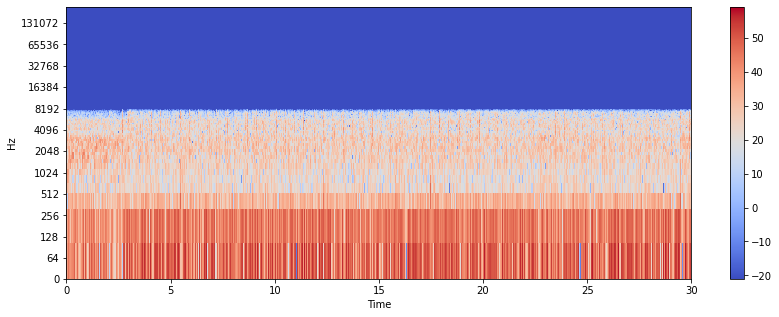

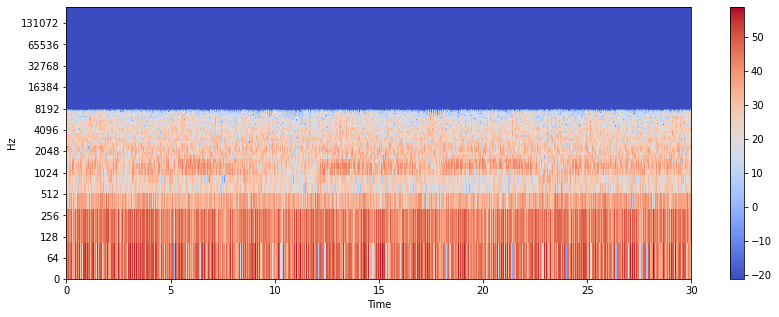

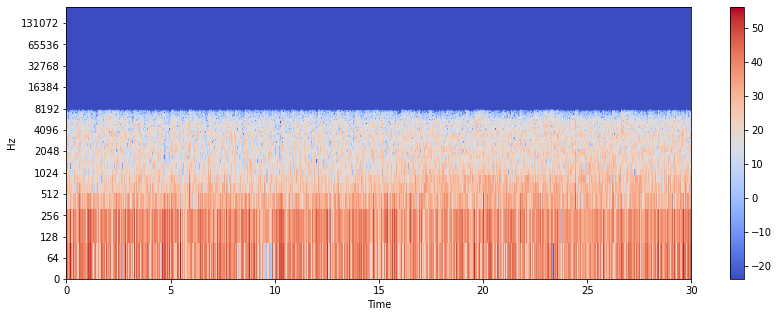

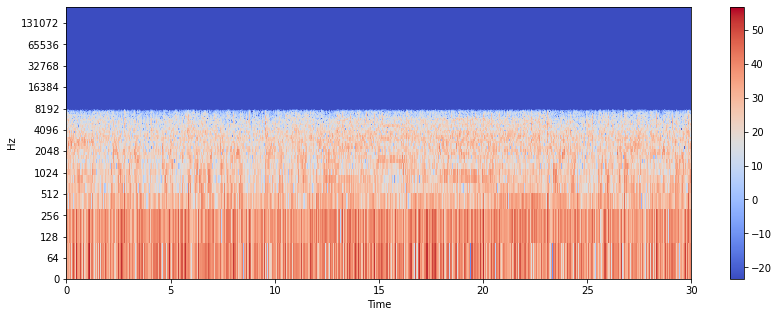

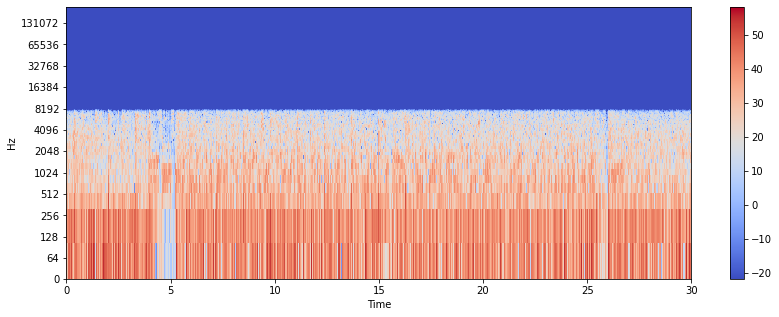

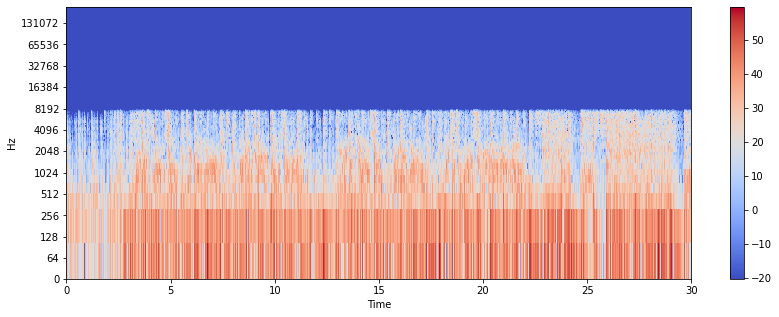

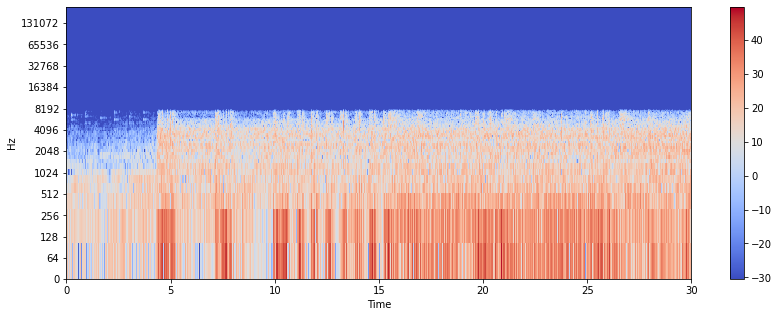

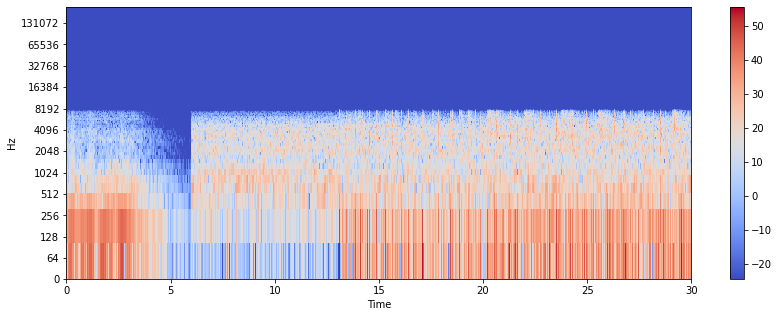

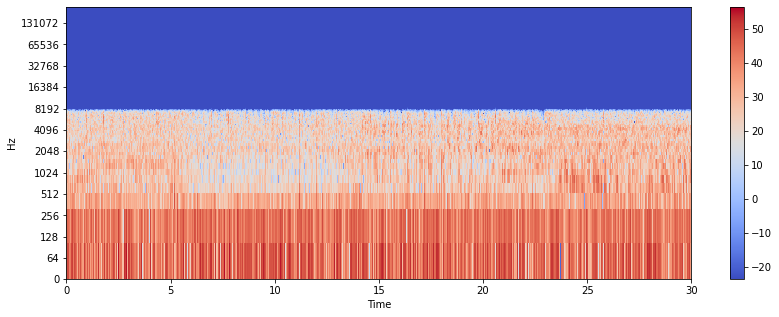

In [17]:
for index, row in df.iterrows():
    if row[1] != "":
        convertYtb(row[1])
        convertSpect(index, row[2])
        os.remove(music_name + ".wav")
    else:
        break